In [139]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [140]:
import numpy as np
import pandas as pd

In [141]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
#Had to add the encoding argument as it was throwing some error
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [142]:
df.shape

(5572, 5)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1) Data Cleaning

In [144]:
# dropping last 3 cols as they were unnamed and useless
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
934,spam,Dear Matthew please call 09063440451 from a la...
4087,ham,He needs to stop going to bed and make with th...
4957,ham,Why didn't u call on your lunch?
1710,ham,"(No promises on when though, haven't even gott..."
4781,ham,"Call me, i am senthil from hsbc."


In [146]:
from sklearn.preprocessing import LabelEncoder # for encoding
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()
# it has encoded ham-0 and spam-1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [148]:
# check for duplicate values
df.duplicated().sum()

403

In [149]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

2) Exploratory Data Analysis (EDA)

In [150]:
df['target'].value_counts()

,count
target,
0,4516
1,653


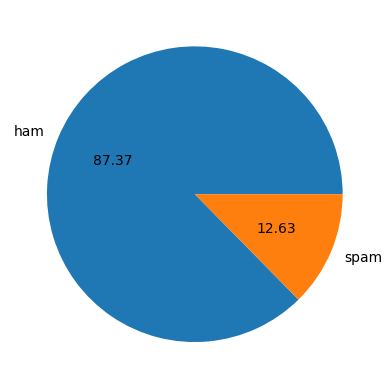

In [151]:
import matplotlib.pyplot as plt ## used for visualisation
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is clearly imbalanced


---



In [152]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
nltk.download('punkt_tab')
## sentences broken into tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [153]:
# num of characters
df['num_characters'] = df['text'].apply(len) # for each row we are calculating number of characters

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
## This is a function from the Natural Language Toolkit (NLTK) library.
## It tokenizes (splits) the text x into a list of words based on linguistic rules (e.g., handling punctuation, contractions, etc.).

# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # this is sentence tokeniser

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [154]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [155]:
df[['num_characters','num_words','num_sentences']].describe()  # it is describing the new coulumn

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [156]:
# ham=0, go to each row check if its ham and then only give us the description
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [157]:
#spam=1, go to each row and then give count,mean etc
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

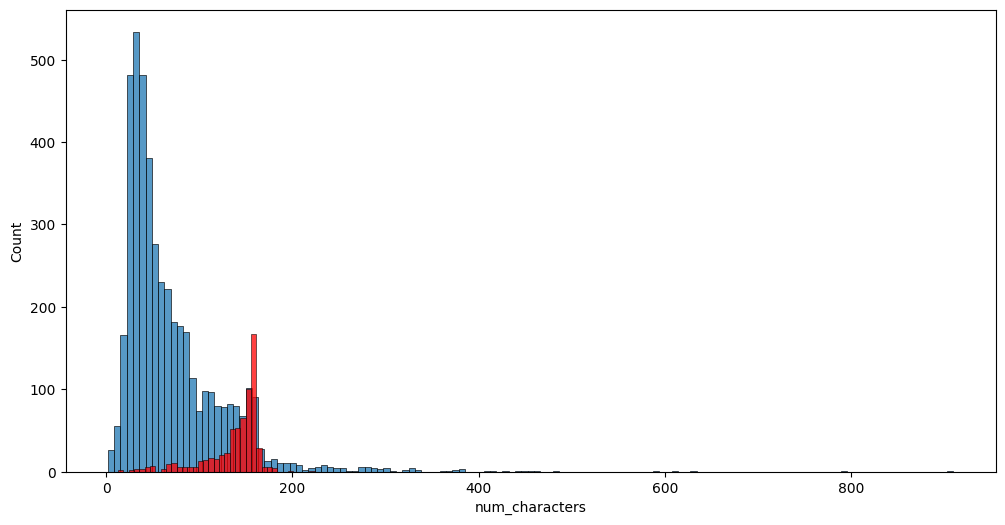

In [158]:
import seaborn as sns
# Data visualisation Module
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
# number of characters in ham is way more than number of charcters in spam

<Axes: xlabel='num_words', ylabel='Count'>

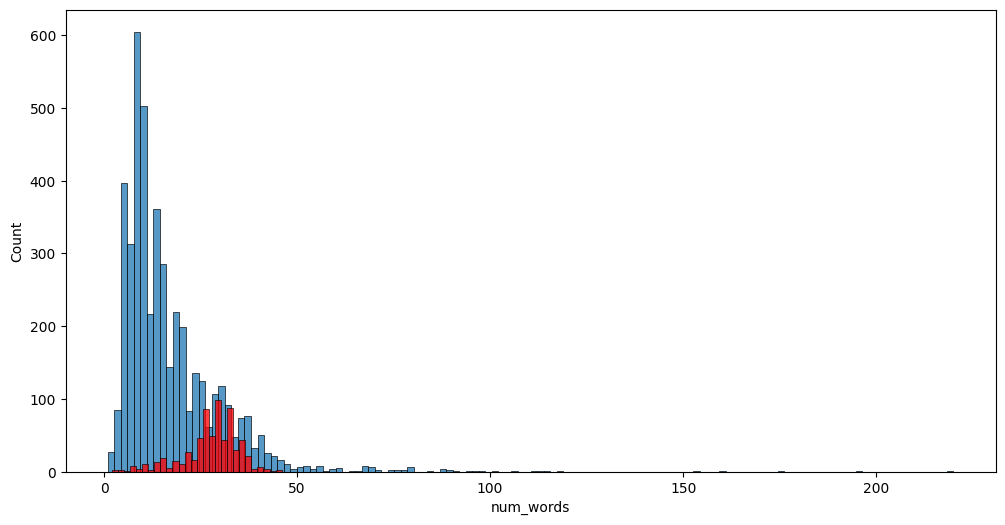

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

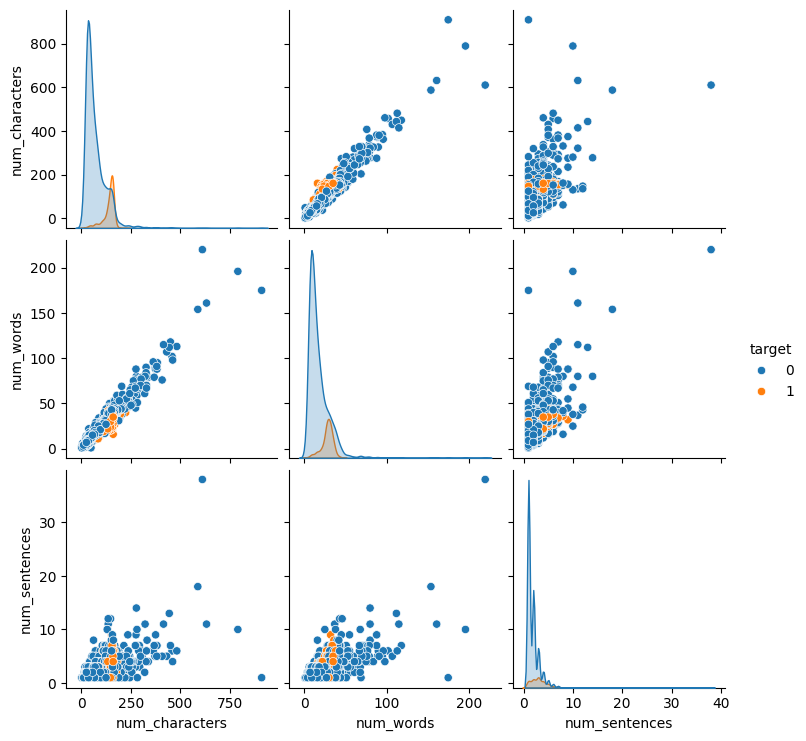

In [160]:
sns.pairplot(df,hue='target')
## comparision of number of sentences to number of words to number of charcters
## the more the number of charcters the more words the more sentences

In [161]:
print(df.dtypes)

target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


<Axes: >

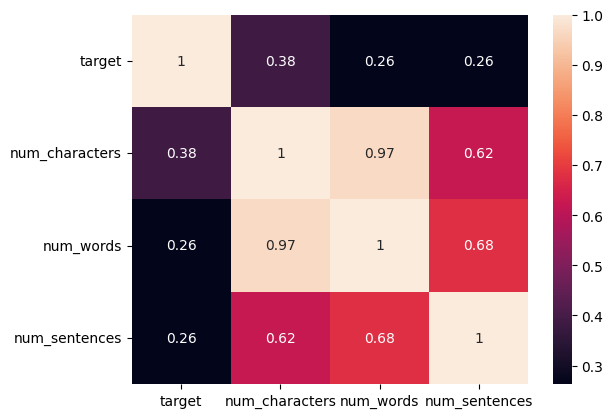

In [162]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)
## The number of characters more then words more is shown by 0.97  relation

# 3. Data Preprocessing


*   Lower case-convert whole to lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming-reducing the words to root form (memory limited therefore reduce text as much as possible)

In [163]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [164]:
stopwords.words('english') # not very usefull and removing them does not affect the output very much
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [165]:
import string



---


 **transform(text) -----> apply above methods ----> clean data **


text = y:

This creates a reference to the same object in memory.
Modifying text would also modify y, as both refer to the same object.

text = y[:]:

This creates a shallow copy of y.
Modifying text will not affect y, because text is a separate object.


---



In [166]:
def transform_text(text):
    text = text.lower() # lower casing
    text = nltk.word_tokenize(text)  ## tokenising

    y = [] # we removed the special characters
    for i in text:
        if i.isalnum(): # if the charcter is alphanumeric character or not (a-z, 1-9)
            y.append(i)

    text = y[:] # copied y into text with refference to new object
    y.clear()

    for i in text: ## stop word removal
        if i not in stopwords.words('english') and i not in string.punctuation: # if word not in stopword then only copy in final data set
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i)) ## converting to root form


    return " ".join(y)

In [167]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
# we are testing whether function correct implement or not

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [168]:
df['transformed_text'] = df['text'].apply(transform_text) ## would go one by one to each row and apply transform text
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [169]:
import wordcloud

In [170]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # generate wordcloud of all the spam text

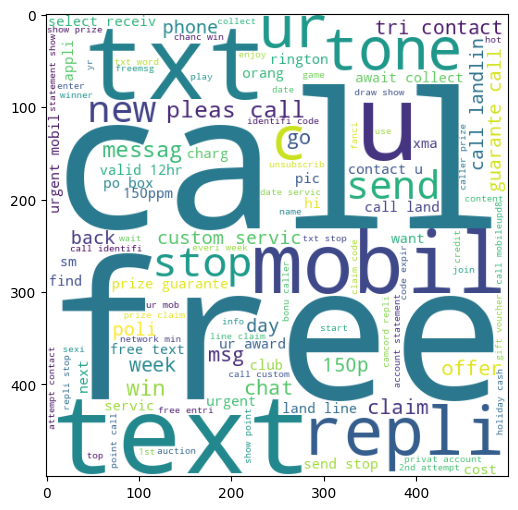

In [171]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# the more the word is repeating in spam the bigger it is

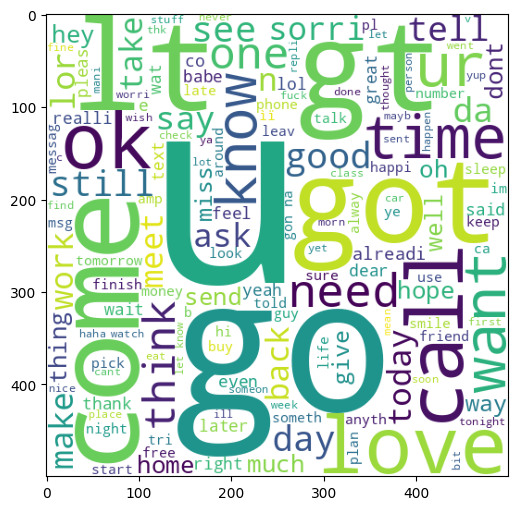

In [172]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) # generate wordcloud of all the ham text

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [173]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

## we are keeping all spams inside different array

In [174]:
len(spam_corpus)
## we have 9939 spam words

9939

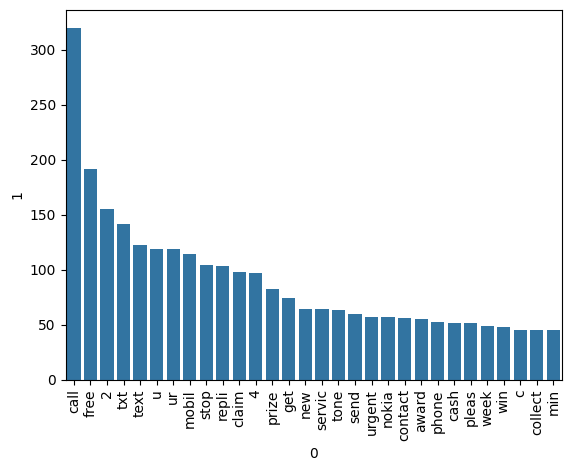

In [175]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## we can see the words to its frequency used in spam mails

In [176]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [177]:
len(ham_corpus)

35404

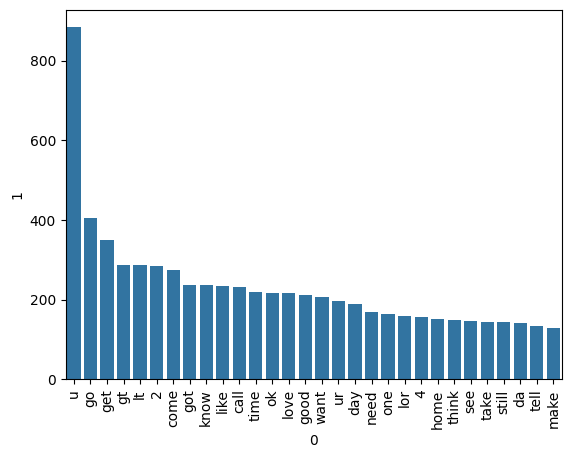

In [178]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [179]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  # each sentence being converted to vector of size 3000, see the x.shape the coulumns max go 3000
## tfidf: termed frequency inverse document frequency
## encoding technique- we have data in form of text , vector form convertion of tokens , vectorisation,embedding called

In [180]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # sentence converted to vectors
y = df['target'].values

In [181]:
X.shape

(5169, 3000)

In [182]:
X[0].shape

(3000,)

In [183]:
y=df['target'].values

In [184]:
print(y)
## converted hama nd spam

[0 0 1 ... 0 0 0]


In [185]:
#commenting out this block as it did not help to improve the model performance

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [186]:
#commenting out this block as it did not help to improve the model performance

# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [188]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB ## we are using three models to compare
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [189]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



---
1. **`accuracy_score(y_test, y_pred1)`**: Measures the proportion of correct predictions out of the total predictions.  

2. **`confusion_matrix(y_test, y_pred1)`**: Summarizes prediction performance by showing counts of True Positives, True Negatives, False Positives, and False Negatives.  

3. **`precision_score(y_test, y_pred1)`**: Calculates the proportion of correctly predicted positive cases out of all predicted positives.


---




In [190]:
gnb.fit(X_train,y_train) #step1
y_pred1 = gnb.predict(X_test) # step2
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

# ste1: The model learns the relationship between the features in X_train and their corresponding labels in y_train by estimating probabilities using the Gaussian Naive Bayes algorithm.After this step, the model is ready to make predictions.
# step2 : The model predicts the class labels for each sample in X_test based on the probabilities it has learned during training.Output:y_pred1: An array of predicted class labels for the test set.

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [191]:
# doing same for multinomia
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [192]:
# Bernoulli
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187




---


here bernoulli is performing well but initially we saw that there was data imbalance , we had more ham text than spam text and since multinomia has next best score and can handle data imbalance well

tfidf with MNB performed the best so far

---



In [193]:
import pickle # model trained then we can download it locally in computer and pickle files allow us to download , now when we insert values in this local model it gives us output
pickle.dump(tfidf,open('vectorizer.pkl','wb')) # the vector values of sentences
pickle.dump(mnb,open('model.pkl','wb')) # the multinomial values we recieved